# COVID-19 SEIR Simulation

With the spread of the disease COVID-19, epidemiologists have devised a strategy to "flatten the curve" by applying various levels of social distancing (sd). The strategy is to reduce the transmission of the virus SARS-CoV-2 so that the healthcare system is not overburdened. Social distancing lowers the total number of people who are infected to keep hospitals below full capacity and reduces the total cumulative infected. Social distancing also minimizes the pandemic until a vaccine or effective treatments can be developed.

### Economic Considerations
One of the downsides of extended social distancing is economic disruption where businesses fail, unemployment rises, supplies become scare, and assistance is needed to provide for the most vulnerable. Repeated outbreak cycles over multiple years are common when the virus mutates and the fraction of susceptible individuals is high. The objective of this exercise is to simulate the effect of social distancing to change the outcome over 200 days.

### SEIR Compartmental Model
The fraction of Susceptible, Exposed, Infected, and Recovered (SEIR) population is given by a compartmental model with four differential equations.

$$\frac{ds}{dt} = -(1-u)\beta s i$$
$$\frac{de}{dt} = (1-u)\beta s i - \alpha e$$
$$\frac{di}{dt} = \alpha e  - \gamma i$$
$$\frac{dr}{dt} = \gamma i$$

* Susceptible (s): population fraction that is susceptible to the virus
* Exposed (e): population fraction is infected with the virus but does not transmit to others
* Infectious (i): population fraction that is infected and can infect others
* Recovered (r): population fraction recovered from infection and is immune from further infection

This model is a simplification and neglects mortality and birth rates. There is also an opportunity to update the model with data sources such as search engine queries to improve early identification of regional outbreaks. Outbreak data on cruise ships give a controlled study to better assess under-reported cases. The model also neglects the variable fraction of infected patients that will need healthcare services. This fraction depends on how well vulnerable populations such as the elderly or immuno-compromised patients are protected.

* Change the social distancing (u=0 (none), u=1 (total isolation)) to alter the outcome. A starting simulation model in Python predicts the response with a single social distancing factor $(u=0)$ for 200 days for a campus population of 33,517.
* Fill in the equations in the covid function definition.

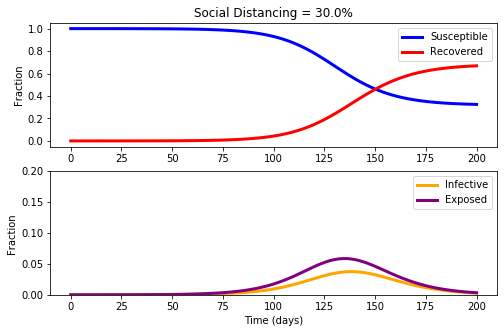

In [13]:
# Import modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Params
u = 0.3  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes
t_incubation = 5.1
t_infective = 3.3
R0 = 2.4
N = 33517 # students

# Initial number of infected and recovered individuals
e0 = 1/N
i0 = 0.00
r0 = 0.00
s0 = 1 - e0 - i0 - r0
x0 = [s0,e0,i0,r0]

# Params
alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# Model
def covid(x,t):
    s,e,i,r = x
    dx = np.zeros(4)
    dx[0] = -(1-u) * beta*s*i
    dx[1] = (1-u) * beta*s*i - alpha*e
    dx[2] = alpha*e - gamma*i
    dx[3] = gamma*i
    return dx

# Simulate
t = np.linspace(0, 200, 101)
x = odeint(covid,x0,t)

# Get results
s = x[:,0]; 
e = x[:,1]; 
i = x[:,2]; 
r = x[:,3]

# Plot the data
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.title('Social Distancing = '+str(u*100)+'%')
plt.plot(t,s, color='blue', lw=3, label='Susceptible')
plt.plot(t,r, color='red',  lw=3, label='Recovered')
plt.ylabel('Fraction')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t,i, color='orange', lw=3, label='Infective')
plt.plot(t,e, color='purple', lw=3, label='Exposed')
plt.ylim(0, 0.2)
plt.xlabel('Time (days)')
plt.ylabel('Fraction')
plt.legend()

plt.show()